# **COMM475--Investment Policies: Tactical Asset Allocation**

Instructor: Lorenzo Garlappi &copy; 2024<sup>*</sup>

TA: Tina Xi Tian

<sup>*</sup> <small>These notes are based on Rob Heinkel and Bill Tilford's lecture notes. I am grateful to them for generously sharing this material with me.</small>

#Outline#


**1. Subcategories of Dynamic Asset Allocation (DAA)**

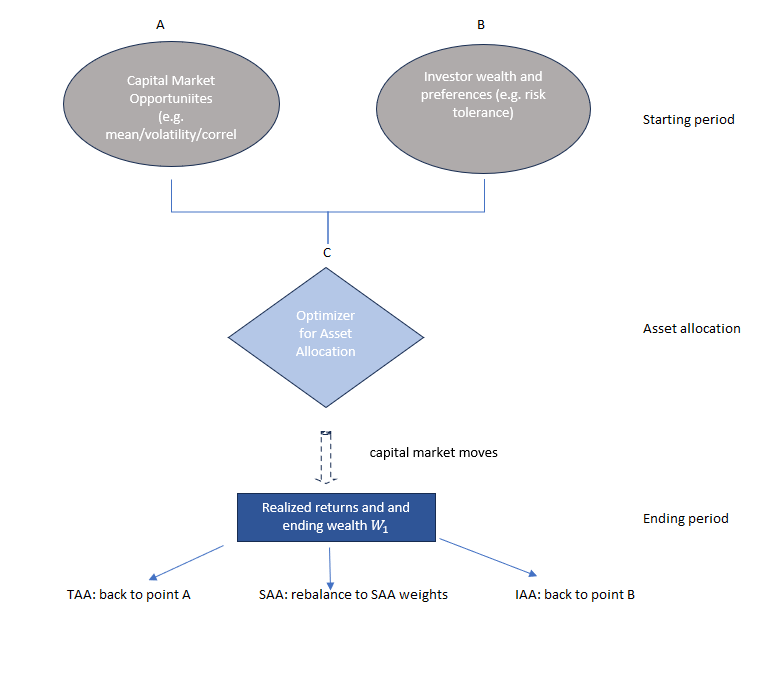

**2. The Basic ''Contrarian'' TAA Principle as Applied to TAA**

* Mean reversion in stock prices (negative return correlation)

**3. TAA Models**

* The General Methodology of Estimating the Equity Risk Premium (ERP)

* Fama, French (FF) Predictive Model

* Chen Predictive Model

**4. Practical TAA Measures**

* How to Estimate ERP Directly

* A Simple TAA Implementation

**5. Summary**
* The ERP is hard to predict

* The ERP is related to the business cycle


# **1. TAA: Definitions of SAA, TAA and IAA**

### TAA: William Sharpe's characterization of SAA, TAA and IAA###

After a market move:

> For TAA: Go back to point A
>> Adjust **expectations** about asset returns

> For SAA: Relalance to SAA weights in point B
>> Adjust portfolio **weights**

> For IAA: Go back to point C
>>Update **preferences** (e.g., risk tolerance) as a result of change in wealth


Assume two possible investments:
* Bonds with $E[r_{B}]$  and $σ_{B}$
* Stocks with $E[r_{S}]$  and $σ_{S}$
* Covariance between bonds and stock of $σ_{BS}$

The investor chooses $X_{st}$ as the proportion invested in stock at date $t$, with $1-X_{st}$ invested in bonds, to maximize the investor's expected utility, with a **relative risk tolerance** ($RRT[W_{t}]$), which depends upon the investor's wealth, $W_{t}$ at date $t$. $RRT[W_{t}]$ increases with $W_{t}$: as wealth goes up, an investor gets more aggressive, i.e., is willing to take more risk.

\\
The portfolio choice problem for the investor:
$$\max_{X_{st}} E[R_{t}] -  \frac{1}{2RRT[W_{t}]} V[R_{t}]$$

\\

where $E[R_{t}] = X_{st}*E[r_{S}] + (1-X_{st})*E[r_{B}]$, and $V[R_{t}] = X_{st}^{2}σ_{S}^{2} + (1-X_{st})^{2}σ_{B}^{2} + 2X_{st}(1-X_{st})σ_{BS}$

\\

Take first order condition on $X_{st}$:

$E[r_{s}] - E[r_{B}] -\frac{1}{2RRT[W_{t}]}(2X_{st}\sigma_{S}^{2} + 2X_{st}\sigma_{B}^{2} - 4X_{st}\sigma_{BS} + 2\sigma_{BS} - 2\sigma_{B}^{2}) = 0 $

\\

The solution takes the following form:

$X_{st}=K_{0}+K_{1t}*RRT[W_{t}]$

Where $K_{0}$ and $K_{1t}$ are constants given by
\begin{align*}
 K_{0}&=\frac{σ_{B}^2-σ_{BS}}{σ_{B}^2+σ_{S}^2-2σ_{BS}}\\\
  K_{1t}&=\frac{E_{t} [r_{S}]-E[r_{B}]}{σ_{B}^2+σ_{S}^2-2σ_{BS}}
\end{align*}


**SAA Investing**:

$K_{0}$, $K_{1t}$ and $RRT[W_{t}]$ are all taken as constant and unchanging over time under SAA. This is assuming:
> (i) no changes in risk assessments ($\sigma_{B},\sigma_{S},\sigma_{BS}$)

> (ii) no changes in expected stock returns $E_{t}[r_{S}]=E[r_{S}]$ is independent of $t$, i.e., it is a long-run expectation

> (iii) no change in $RRT[W_{t}]$ because SAA assumes the investor doesn’t worry about short-run changes in wealth.

With these three assumptions, SAA is thus assuming that $X_{st}$ is the same at each date $t$. The Mean-Variance Efficient Frontier (MVEF) does not move, and the optimal point on that curve (determined by the investor's $RRT[W_{t}])$ does not move.

**TAA Investing**:

We will continue to assume (in all three DAA styles) that there are no changes in risk assessments ($\sigma_{B},\sigma_{S},\sigma_{BS}$). BUT, with TAA, the investor alters their $E_{t}[r_{S}]$ at each date $t$, as the investor alters the belief about upcoming stock expected returns. For simplicity, we assume $E[r_{B}]$ does not change. Thus, $K_{1t}$ changes at each date $t$ (link A on the previous Sharpe Chart) so that $X_{st}$ changes at each date $t$. As $E_{t}[r_{S}]-E[r_{B}]$ increases, so does $X_{st}$. Because expected returns change, the MVEF changes, but the $RRT[W_{t}]$ is assumed to stay constant in TAA. So, the TAA investor will change their portfolio weighting each period as their outlook for the stock market changes each period.

**IAA Investing**:

In IAA investing, $RRT[W_{t}]$ changes at each date as the investor's wealth changes: when $W_{t}$ gets bigger, risk tolerance also increases ($RRT$ increases) as the investor is more aggressive when she is wealthier. Thus, $X_{st}$ changes at each date as $RRT$ changes: higher wealth means a bigger $RRT$ which means a bigger $X_{st}$. The MVEF does not move, but the $RRT$ point on the curve does, so $X_{st}$ moves.


The following functions calculate K0, K1 and stock weight from assets volatility and returns.

In [ ]:
# calculate K0
def K0(sigma_b,sigma_s,corr):
  K0 = (sigma_s*sigma_s - corr*sigma_b*sigma_s)/(sigma_b*sigma_b + sigma_s*sigma_s - 2*corr*sigma_b*sigma_s)
  return K0

# calculate K1
def K1(rb,rs,sigma_b,sigma_s,corr):
  K1 = (rs-rb)/(sigma_b*sigma_b + sigma_s*sigma_s - 2*corr*sigma_b*sigma_s)
  return K1

# calculate stock weight
def stock_weight(rb,rs,sigma_b,sigma_s,corr,RRT):
  denom = sigma_b**2 + sigma_s**2 - 2*corr*sigma_b*sigma_s
  sigma_bs = corr*sigma_b*sigma_s
  K0 = (sigma_s**2 - sigma_bs)/denom
  K1 = (rs - rb)/denom
  return K0+RRT*K1


In [ ]:
import numpy as np

# Example

rb = 0.03
rs = 0.05
sigma_b = 0.2
sigma_s = 0.30
corr = 0.1
RRT = 1/3

print("K0 is:", np.round(K0(sigma_b,sigma_s,corr),3))
print("K1 is:", np.round(K1(rb,rs,sigma_b,sigma_s,corr),3))

print("The stock weight X_{st} chosen by the investor is:", np.round(stock_weight(rb,rs,sigma_b,sigma_s,corr,RRT),3))

K0 is: 0.712
K1 is: 0.169
The stock weight X_{st} chosen by the investor is: 0.768


Suppose that the investor becomes more risk tolerant as his/her wealth increases. What happens to the portfolio weight in stocks, $X_{st}$?

**TAA: Mean Reversion in the Stock Index Price Level (
Negative Serial Correlation in Stock Index Returns)**


The basic hypothesis of contrarian TAA investing is that the stock index price level fluctuates around its long-term trend line, overshooting too high, reverting back, and then overshooting too low and reverting back, etc. The graph on the next page illustrates this viewpoint.

* When the index is too low (at $t=2$):

> $E_{2}[r_{S}]$ (the expected slop from $t=2$ to $t=3$) is greater than the long-term trend line. The simple theory: investors are poor (the stock index is low, so stock wealth is small) and so they demand a higher $E_{2}[r_{S}]$ before being willing to invest in risky stocks.



* When the index is too high (at $t=1$ and $t=3$):

> $E_{1}[r_{s}]$ (the expected slop from $t = 1$ to $t=2$) is (<u>less than</u>) the long-term trend line (although it should never be less than the riskless rate). The simple theory: investors are rich (the stock index is high, so stock market wealth is big) and so they are willing, even at a low $E_{1}[r_{S}]$, to invest in risky stocks.



In this contrarian TAA model, the stock index price level reverts back to its long-run trend line when it deviates too far from that trend line. Empirical evidence for this theory of stock index price movements was offered in the Preview section with the graph that showed no significant 1-year serial correlation in any size classes and significant negative serial correlation in 4-year returns in all size classes (and so in the market as a whole). Thus, the contrarian thoery of TAA will be used here, with a peak-to-through length measured in several years, not in shorter time frames, where no serial correlation shows up.

**TAA: A Mean-Reverting Stock Index**

Assume investors perceive the stock index behaving as shown below for the next 25 years. They see it mean-reverting around a growth trend. At times of a high stock index level, investors are rich and they are willing to accept a lower expected return to bear the risk of the stock market. At a low stock index level, investors are poor and demand a high expected growth rate in order for them to bear risk.

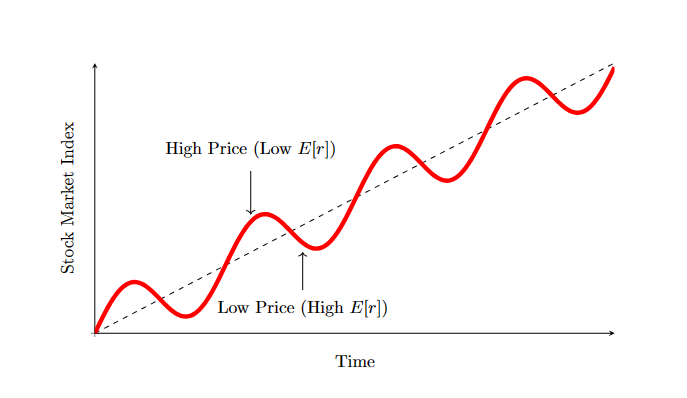

Thus, as investors' attitude towards bearing risk changes, the “market price of risk / risk premium” ($\lambda$ in the CAPM) changes. $\lambda$ is positively related to the expected return on the stock market, $E[r_{S}]$.

* When price gets too high, it reverts back to the long-term trend, but usually over-shoots and goes too low.
* When price is low, $E[r_{S}]$ is high, and vice-versa.

A contrarian investor may take market risk as constant. Then as expected market return varies (low price means high $E[r_{S}]$ and high price means low $E[r_{S}]$, the reward-to-risk ratio of investing in the market varies. The contrarian invests when price is low, so the reward-to-risk ratio is high.

# **2. TAA: The General TAA Methodology: Determining $𝑬_{𝒕}[𝒓_{𝑺}]$**

The TAA manager must identify predictor variables, which are economic (or behavioral) variables that can be observed at regular intervals (e.g., monthly) that the manager believes predict future stock (or any asset class) returns. That is:

**Predictor variables forecast $𝐸_{𝑡} [𝑟_{𝑆}]$** (and/or other asset class expectations). The TAA process has two steps:

\\

**TAA Step 1**. Find predictor variables and determine their relationship to $𝐸_{𝑡} [𝑟_{𝑆}]$

Finding predictor variables that are correlated with future stock returns is usually done with regression analysis, by regressing stock returns on predictor variables that are observable before the stock return occurs:

$𝑟_{sq}=𝑎+𝑏_{1}𝑃V_{1𝑞} +𝑏_{2}𝑃V_{2𝑞} +𝑒$

Where:

* $𝑃V_{1𝑞}$ and $𝑃V_{2𝑞}$ are the observations of the predictor variables at **the start** of quarter $q$
* $𝑟_{𝑠q}$ is the stock index return over quarter $q$ (returns happen over time!)

When a relationship is found, stock returns are predicted from the regression model:

$𝐸[𝑟_{𝑠q}]=𝑎^{′}+𝑏_{1}^{′}𝑃V_{1𝑞} +b_{2}^{′}𝑃V_{2𝑞}$

Where:
* $𝐸[𝑟_{sq}]$ is the prediction made for the upcoming quarter $q$ (the output of this step)
* $𝑎^{′}$,$𝑏_{1}^{′}$ and $𝑏_{2}^{′}$ are the coefficients from the regression done above on historical data
* $𝑃V_{1𝑞}$ and $𝑃V_{2𝑞}$ are the current (at the start of quarter $q$) observations of the predictor variables

\\

**TAA Step 2**. Convert the $E_{t}[r_{S}]$ estimate to a stock/bond allocation in your TAA portfolio

Once the stock return is estimated, it must be converted to a TAA allocation (i.e., how much in stock and how much in other asset classes?). We will look at using mean-variance analysis to do this.

# **3. TAA: The Fama-French (FF) Predictive Model**

<p style="color: red;">Warning! Database under construction. The results might be inaccurate. However the code should be correct. This section will be updated.</p>

In this section, we report the original analysis from Fama-French predictive model and then followed with python code to reproduce the results.

We will think of TAA as arising because the TAA investor believes in a time-varying equity risk premium (ERP). For example, in the CAPM, we say the “market price of risk” ($𝐸RP =𝐸[𝑟_{𝑚}]−𝑟_{𝑓})$ is a constant. But, in TAA, we assume that the compensation investors want for bearing stock market risk (this is the “market price of risk”) varies through time.

FF describe a consumption smoothing story about a time-varying equity risk premium (ERP).
* At an economic peak, investors' income is higher than their desired consumption, so all investors are seeking investments: this drives up prices of risky assets, driving down expected returns.
* At an economic trough, investors' income is less than their desired consumption, so they must liquidate their investments to consume; this drives prices of risky assets down and expected returns up. This links expected returns (like the ERP) to the economic cycle: high expected returns at economic troughs and low expected returns at economic peaks.

Most simply: ERP varies inversely with price: low price <=> high ERP (and vice-versa).

FF use three predictor variables:

* **DP = dividend yield on all NYSE stocks = Dividend/Price**

> Since dividends on all stocks are fairly constant, DP is inversely related to the index price level.
So, low prices => high DP => high expected returns.

* **DEF = AllLTYld - AaaLTYld**
> the yield on a portfolio of 100 (government (riskless) and corporate (risky)) long-term maturity bonds - the yield on a portfolio of long-term low-risk (Aaa rated) bonds.

> Since there is default risk in the AllLTYld but none in the AaaLTYld, DEF is the default (or credit) spread. Low prices for risky bonds means high risky bond yields, which means a high DEF. But, low junk bond prices mean high expected returns on junk bonds (and, it is hypothesized, on stock returns as well).

> So, high DEF => high expected returns.

* **TERM = AaaLTYld - TBillYld**
> the yield on a long-term riskless bond portfolio minus the yield on a short-term riskless bond portfolio.

> This is called the "term spread" and represents the slope of the yield curve. Empirically, a steep yield curve (a high TERM) occurs at economic troughs; expected returns are higher at economic troughs. And, at economic peaks, the yield curve is flat or sometimes even inverted; economic peaks feature low expected returns.

> Thus, high TERM => high expected returns.

An important aspect of the FF study is that they investigate if the predictor model predicts subsequent (a) monthly returns, or (b) quarterly returns or (c) annual returns or (d) 4-year returns. This helps us confirm whether the contrarian TAA hypothesis of long-term mean reversion in stock index returns applies.

FF look at predicting the returns on 4 asset classes:
* Aaa = long-term riskless bonds
* LG = long-term, low-grade, i.e., risky bonds
* VW = a value-weighted stock portfolio, i.e., a big-cap stock portfolio
* EW = an equally-weighted stock portfolio, i.e., a small-cap stock portfolio.

Thus, FF investigates if the three predictor variables, DP, DEF and TERM, have any predictive power in forecasting the future returns on 4 asset classes: Aaa, LG, VW and EW. These four asset classes have very different return profiles, so we would expect different levels of predictive success among the predictor variables.

**TAA: Fama-French Results**

Now we load historical data and take a look at patterns of FF risk factors. First we load packages that we need for our analysis.

In [4]:
#load package
import pandas as pd
import numpy as np

from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Here we load data. The data includes Fama-French risk factors, factors for Chen predictive models, and asset returns

In [7]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# load Quarterly data, where data is accessiable from github.
csv_riskfactors = 'https://raw.githubusercontent.com/lorenzogarlappi/COMM475/main/Data/dp_def_term_agg_clean_mergewithgoyal_simplified_v1.csv'
riskfactors = pd.read_csv(csv_riskfactors)

We take a look at the data structure.

In [8]:
# view the data
riskfactors.head()

,year,quarter,dp,ypl,gnpg_nominal,vwretx,ewretx,D12,tb30,AAA,...,CRSP_SPvwx,def,term,mktrf,date,gnp_nominal,month,realgnpg,realgnpg_lag4,realgnpg_lead4
0,1948,1,0.011496,-0.158932,0.023299,0.076865,0.089610,0.85,0.0100,0.0283,...,0.077022,0.0070,0.0141,0.0807,1948-01-01,267.133,1,0.027,NaN,0.009
1,1948,2,0.013324,-0.129759,0.025549,-0.005419,-0.018277,0.85,0.0100,0.0276,...,0.003687,0.0058,0.0138,-0.0010,1948-04-01,274.046,4,0.047,NaN,-0.011
2,1948,3,0.013529,-0.069494,0.023916,-0.035123,-0.048793,0.87,0.0109,0.0284,...,-0.031159,0.0061,0.0133,-0.0297,1948-07-01,280.679,7,0.055,NaN,-0.006
3,1948,4,0.013071,0.088634,0.004117,0.024024,0.001728,0.93,0.0116,0.0279,...,0.029719,0.0074,0.0121,0.0326,1948-10-01,281.837,10,0.040,NaN,-0.016
4,1949,1,0.013464,0.195577,-0.019407,0.035339,0.052517,0.98,0.0117,0.0270,...,0.029349,0.0077,0.0110,0.0404,1949-01-01,276.420,1,0.009,0.027,0.037


In [ ]:
###########################################
###An overview of variables in the dataset
###########################################

# dp: Dividend price ratio on NYSE stock index
# def: yield spread: yield of all bond - AAA bond yield (source: Goyal's website)
# term: term spread: 10 year US bond yield - 30day treasury yield (source: Goyal's website)
# ypl: annual growth in industrial production (source: FRED)
# tb30: 30day treasury bill yield (source: Goyal's website)
# CRSP_SPvwx: SP500 value weighted index return (source: Goyal's website)
# realgnpg: quarterly real GNP growth (source: FRED)
# mktrf: market premium (source: WRDS)
# Rfree: risk free rate (source: Goyal's website)
# AAA: AAA bond yield (source: Goyal's website)
# BBB: BBB bond yield (source: Goyal's website)
# vwretx: value weighted return of all stocks (source: WRDS)
# ewretx: equal weighted return of all stocks (source: WRDS)

# Goyal's website: https://sites.google.com/view/agoyal145/?redirpath=/

list(riskfactors)


['year',
 'quarter',
 'dp',
 'ypl',
 'gnpg_nominal',
 'vwretx',
 'ewretx',
 'D12',
 'tb30',
 'AAA',
 'BAA',
 'Rfree',
 'CRSP_SPvwx',
 'def',
 'term',
 'mktrf',
 'date',
 'gnp_nominal',
 'month',
 'realgnpg',
 'realgnpg_lag4',
 'realgnpg_lead4']

We plot the FF risk factors to take a look at the data distribution.

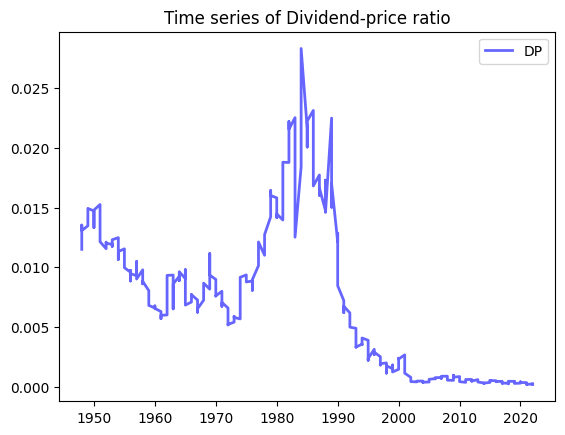

In [9]:
# plot DP
x = riskfactors.year
y = riskfactors.dp

fig, ax = plt.subplots()
ax.plot(x,y, 'b-', linewidth=2, label='DP', alpha=0.6)
ax.legend()
# set the title
ax.set_title("Time series of Dividend-price ratio");


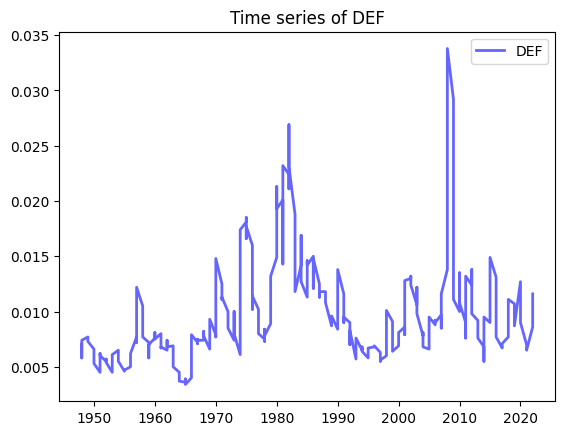

In [ ]:
# plot DEF
x = riskfactors.year
y = riskfactors['def']

fig, ax = plt.subplots()
ax.plot(x,y, 'b-', linewidth=2, label='DEF', alpha=0.6)
ax.legend()
# set the title
ax.set_title("Time series of DEF");

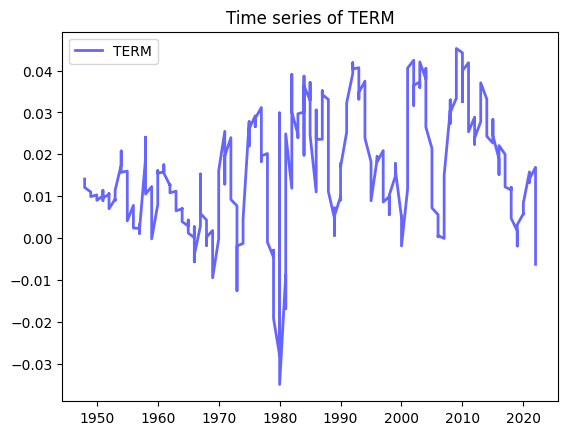

In [10]:
# plot TERM
x = riskfactors.year
y = riskfactors['term']

fig, ax = plt.subplots()
ax.plot(x,y, 'b-', linewidth=2, label='TERM', alpha=0.6)
ax.legend()
# set the title
ax.set_title("Time series of TERM");

Now we use the data to understand the Fama French multi-risk factor results and asset return prediction.

# **Result 1 from Fama French paper**

**DP and DEF are persistent, TERM is not.**

* Both DP and DEF are *autocorrelated with lags*. This means that $Corr(𝐷P_{𝑡} ,𝐷P_{𝑡 +1})>0$, but so is $Corr(𝐷P_{𝑡} ,𝐷P_{𝑡 +2})>0$, and so is $Corr(𝐷P_{𝑡} ,𝐷P_{𝑡 +3})>0$, etc., out to 8 quarterly lags. Same with DEF. This means that when DP or DEF are above/below their means, they tend to stay there for quite a while.

* TERM has positive autocorrelation, but only out to 2 quarterly lags.
* Another interpretation: DP and DEF have long frequencies, TERM has a short frequency.

Now we simulate the results using data. We firstly select the sample period to 1947 - 1987 (1947 is the year that the data sample starts, 1987 is the end year of Fama French paper)

In [14]:
riskfactors = riskfactors.reset_index() #reset index to make year as a column for filtering

# define a start period and end period to select data sample period
start_period = 1948
end_period = 1987

# select sample from start_period to end_period
riskfactors = riskfactors[(riskfactors['year']>=start_period) & (riskfactors['year']<=end_period)]

We then view the correlation between DP, DEF, and TERM.

In [25]:
# three factors for Fama French multi-risk factor model
DP = riskfactors['dp']
DEF = riskfactors['def']
TERM = riskfactors['term']

# In order to study the autocorrelation, we use shift function to get the lag/lead of timeseries
# For example, dpt+1 is a one-lead of the dp; dpt+2 is two-lead of dp
# shift(1): 1-lag / shift(-1): 1-lead

df_dp = pd.concat([riskfactors['year'],DP, DP.shift(-1), DP.shift(-2)], axis=1)
df_dp.columns = ['year','dp_t', 'dp_t+1','dp_t+2']
df_dp.tail()

# compute the spearman correlation between DP and DEF 

correlation = np.corrcoef(DP,DEF)
print("The correlation between DP and DEF is:", np.round(correlation[0,1],3))

# compute the correlation between DP and TERM
correlation = np.corrcoef(DP,TERM)
print("The correlation between DP and TERM is:", np.round(correlation[0,1],3))

# compute the correlation between DEF and TERM
correlation = np.corrcoef(DEF,TERM)
print("The correlation between DEF and TERM is:", np.round(correlation[0,1],3))




The correlation between DP and DEF is: 0.53
The correlation between DP and TERM is: 0.317
The correlation between DEF and TERM is: 0.307


We print the autocorrelation for DP, DEF, and TERM to look at the persistence of these risk factors.

In [16]:
print("DP is highly persistent")
for i in range(1, 4):
    correlation = DP.corr(DP.shift(-i), method='spearman')
    print(f"Corr(DPt,DPt+{i}) is %.4f" % correlation)
print("\n")

print("DEF is persistent")
for i in range(1, 4):
    correlation = DEF.corr(DEF.shift(-i), method='spearman')
    print(f"Corr(DEFt,DEFt+{i}) is %.4f" % correlation)
print("\n")

print("TERM is less persistent")
for i in range(1, 4):
    correlation = TERM.corr(TERM.shift(-i), method='spearman')
    print(f"Corr(TERMt,TERMt+{i}) is %.4f" % correlation)
print("\n")


DP is highly persistent
Corr(DPt,DPt+1) is 0.9621
Corr(DPt,DPt+2) is 0.9218
Corr(DPt,DPt+3) is 0.8856


DEF is persistent
Corr(DEFt,DEFt+1) is 0.9374
Corr(DEFt,DEFt+2) is 0.8762
Corr(DEFt,DEFt+3) is 0.8332


TERM is less persistent
Corr(TERMt,TERMt+1) is 0.8209
Corr(TERMt,TERMt+2) is 0.6310
Corr(TERMt,TERMt+3) is 0.5312




Next we move to Result 2 to understand how Fama French Risk Factors move with Business Cycles.

# **Result 2 from Fama French Paper**

After 1951, TERM is higher at a business cycle trough than it was at either the preceding or subsequent business cycle peak.

* While TERM has lower autocorrelation than DP or DEF, it is typically steep at business cycle troughs and flat (or inverted) at business cycle peaks.

The code below plots the risk factors and business cycles. We simulate with data.

Text(0.5, 1.0, 'TERM is higher at a business cycle trough')

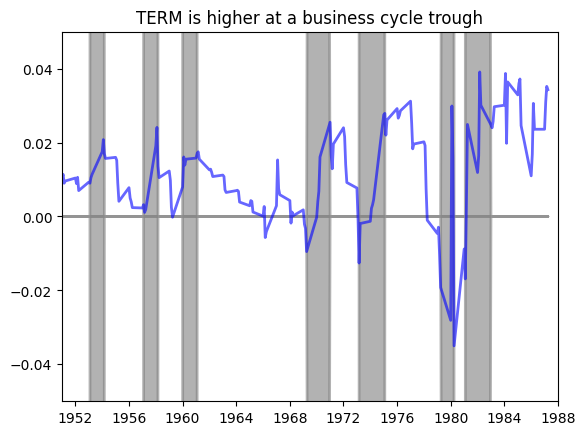

In [21]:

# load data, where data is accessiable from github.
csv_riskfactors = 'https://raw.githubusercontent.com/lorenzogarlappi/COMM475/main/Data/dp_def_term_agg_clean_mergewithgoyal_simplified_v1.csv'
riskfactors = pd.read_csv(csv_riskfactors)
# define a start period and end period to select data sample period
start_period = 1948
end_period = 1987

# select sample from start_period to end_period
riskfactors = riskfactors[(riskfactors['year']>=start_period) & (riskfactors['year']<=end_period)]

# read US recession data
csv_usrec = 'https://raw.githubusercontent.com/lorenzogarlappi/COMM475/main/Data/usrec_quarterly.csv'
rec_data = pd.read_csv(csv_usrec)

# We add date from year and quarter
rec_data["date"] = pd.to_datetime(rec_data.year.astype(int).astype(str) + '/' + rec_data.quarter.astype(int).astype(str) + '/01')
riskfactors['date'] = pd.to_datetime(riskfactors.year.astype(int).astype(str) + '/' + riskfactors.quarter.astype(int).astype(str) + '/01')

# make sure date columns are actual dates
rec_data = rec_data[(rec_data['year']<=1987) & (rec_data['year']>=1948)]
rec_data["date"] = pd.to_datetime(rec_data["date"])
riskfactors['date'] = pd.to_datetime(riskfactors["date"])

# create plot
# to generate the gray area above/below x-axis, I create another usrec2 = - usrec, and produce the gray area below the x-axis.
x = riskfactors['date']
y =  riskfactors['term']

fig, ax = plt.subplots()

ax.plot(riskfactors['date'],riskfactors['term'],'b-', linewidth=2, label='TERM', alpha=0.6)
ax.fill_between(riskfactors['date'],rec_data['usrec'], color ='gray', linewidth=2, label='', alpha=0.6)
ax.fill_between(riskfactors['date'],rec_data['usrec2'],color ='gray', linewidth=2, label='', alpha=0.6)
ax.set_xlim(pd.to_datetime("1951-01-01"), pd.to_datetime("1988-01-01"))
ax.set_ylim(-0.05, 0.05)
ax.set_title("TERM is higher at a business cycle trough")

Now we move to Result 3 to understand the correlation among FF risk factors.

# **Result 3 from Fama French Paper**

Correlations:
* $Corr(𝐷P_{𝑡} ,𝐷EF_{𝑡})=0.75$: DP and DEF move together over time.
* $Corr(𝐷P_{𝑡} ,TERM_{𝑡})=0.16$, and $Corr(𝐷EF_{𝑡} ,TERM_{𝑡})=0.18$: TERM behaves differently than DP and DEF.

DP and DEF have similar characteristics overtime, but TERM is quite different from DP and DEF.



The code below plots DP, TERM, and DEF. The graph shows that TERM is much more volatile than DP and DEF.

Summary statistics for DP
count    160.000000
mean       0.011411
std        0.004716
min        0.005163
25%        0.008006
50%        0.009878
75%        0.014005
max        0.028327
Name: dp, dtype: float64


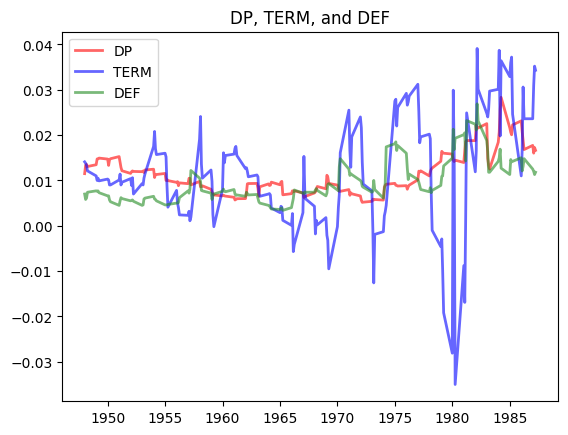

In [38]:
x = riskfactors['date']
DP = riskfactors['dp']
TERM = riskfactors['term']
DEF = riskfactors['def']

fig, ax = plt.subplots()
ax.plot(x,DP,'red', linewidth=2, label='DP', alpha=0.6)
ax.plot(x,TERM,'blue', linewidth=2, label='TERM', alpha=0.6)
ax.plot(x,DEF,"forestgreen", linewidth=2, label='DEF', alpha=0.6)

ax.legend()
ax.set_title("DP, TERM, and DEF");

# Summary statistics for DP
print("Summary statistics for DP")  
print(riskfactors['dp'].describe())

In [31]:
# Here we print the correlation among risk factors

print("Correlation among risk factors")

print("Corr(DPt,DEFt) is %.4f" % DP.corr(DEF))
print("Corr(DPt,TERMt) is %.4f" % DP.corr(TERM))
print("Corr(DEFt,TERMt) is %.4f" % DEF.corr(TERM))

# Note: the correlation results are different here. The reason could be:
#       1). the way to construct DP is not accurate e.g. data frequency (quarterly)
#       2). the construction of DEF does not perfectly replicate the paper.

Correlation among risk factors
Corr(DPt,DEFt) is 0.5299
Corr(DPt,TERMt) is 0.3173
Corr(DEFt,TERMt) is 0.3071


Next we move to Result 4 to study the predictivity of Fama French risk factors on asset returns.


# **Result 4 from Fama French Paper**

FF regress the asset class returns (for Aaa, LG, VW and EW) on the predictor variables (DP, DEF and TERM).

* Almost all the b and c regression coefficients are positive, as predicted.
* In the risky assets (LG, VW and EW): as the return horizon increases, DP and DEF have improving t-stats, while TERM t-stats are decreasing (lower predictive ability) as the return horizon increases.

t-stats on the regression coefficients
from regressing VW on DP, DEF and TERM

t-stat | DP |DEF |TERM
--------|--|-------|--------------
Monthly returns | 2.88 | 1.43 |3.25
Quarterly returns |2.93 |1.61 |2.10
Annual returns |3.45 |2.12 |0.97
4-Year returns |5.26 |3.94 |-0.58

* <u>Conclusion from Result 4</u>: DP and DEF are better predictors of risky asset returns at longer return horizons. TERM does not get better at longer horizons.

This is consistent with Result 1, which said that DP and DEF are persistent (high auto correlation): they have “long cycles” and don’t move up and down greatly over the shorter terms. So, they would be better at predicting longer term returns: Seeing a high (relative to normal) DP today, indicates a good likelihood that returns will be higher than normal over the next 4 years (t-stat is 5.26, well above the usual 2.0 “significance cutoff” level).

Next we study the predictivity of FF risk factors **DP and TERM on asset returns**, and the predictivity of FF risk factors **DEF and TERM on asset returns**. FF does NOT regress the asset class returns on DP and DEF together because DP and DEF are highly correlated (remember, regression analysis assumes the independent, left-hand side, variables have ZERO correlation); DP and DEF have correlation of 0.75!


Asset returns we consider include AAA bond return, BAA bond return, and value weighted index return.


The code below simulates the predictivity of Fama French risk factors DP and TERM on asset returns. Firstly we load the asset returns and risk factors. Asset returns include AAA bond return,  BAA bond return, and value weighted index return.

In [32]:
# Asset used include Aaa bond yield, Baa bond yield, value weighted index return. The asset return frequency is on quarterly basis.
AAA = riskfactors['AAA'] #AAA bond return
LG = riskfactors['BAA'] #BAA bond return
VW = riskfactors['vwretx'] #value weighted index return on all stocks

# load FF risk factors
DP = riskfactors['dp']
DEF = riskfactors['def']
TERM = riskfactors['term']

We construct a multiple regression function to predict asset returns. X represent the set of risk factors, and Y represents asset returns.

In [33]:
# We build a function that we can predict asset returns
# X represent risk factors, Y represent asset return

def multiple_regression(X,Y):

    # Add a constant to X
    X = sm.add_constant(X)

    # Replace NaN values with the mean of the column
    X = X.fillna(X.mean())
    Y = Y.fillna(Y.mean())

    # Fit and summarize OLS model
    results = sm.OLS(Y, X).fit()
    return results

# Instructions on how to run regressions:
# To run a regresson of the returns on Equity on the returns on GDP and RTS, we can use the following commands:
#  X = riskfactors[['dp', 'term']]
#  Y = riskfactors['AAA']
#  results = multiple_regression(X,Y)

# To see the resujlts, type
# results.summary()

# To extract the coefficients, type
# results.params

# To extract the t-stats, type
# results.tvalues

# To extract the R-squared, type
# results.rsquared


The prediction results are as below when risk factors are DP and TERM, asset return is AAA bond yield.

In [34]:
X = pd.concat([DP, TERM], axis=1) # risk factor
Y = riskfactors['AAA'] # AAA asset return


results_AAA = multiple_regression(X,Y)
results_AAA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AAA   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     30.31
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           7.38e-12
Time:                        15:36:55   Log-Likelihood:                 342.00
No. Observations:                 160   AIC:                            -678.0
Df Residuals:                     157   BIC:                            -668.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0233      0.006      3.890      0.000       0.011       0.035
dp             3.7102      0.511      7.262      0.000       2.701       4.719
term           0.0696      0.194      0.359      0.720      -0.314       0.453
==============================================================================
Omnibus:                       11.024   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                4.485
Skew:                          -0.074   Prob(JB):                        0.106
Kurtosis:                       2.193   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next we use historical data to understand the FF results illustrated above. Note that the results are not prepared to replicate the numbers above because of data discrepancy we used. You should take this as a chance to understand Fama French multi-risk factor model with historical data.

The following code studies the predictivity of Fama French risk factors DP and TERM

In [ ]:
#returns of risk assets
AAA = riskfactors['AAA'] #AAA bond return
LG = riskfactors['BAA'] #BAA bond return
VW = riskfactors['vwretx'] #value weighted index return on all stocks

DP = riskfactors['dp']
DEF = riskfactors['def']
TERM = riskfactors['term']


In [ ]:
# We build a function that we can use repeatedly to run regressions
def multiple_regression(X,Y):
    # Add a constant to X
    X = sm.add_constant(X)

    # Replace NaN values with the mean of the column
    X = X.fillna(X.mean())
    Y = Y.fillna(Y.mean())

    # Fit and summarize OLS model
    results = sm.OLS(Y, X).fit()
    return results

# Instructions on how to run regressions:
# To run a regresson of the returns on Equity on the returns on GDP and RTS, we can use the following commands:
#  X = riskfactors[['dp', 'term']]
#  Y = riskfactors['AAA']
#  results = multiple_regression(X,Y)

# To see the resujlts, type
# results.summary()

# To extract the coefficients, type
# results.params

# To extract the t-stats, type
# results.tvalues

# To extract the R-squared, type
# results.rsquared


For example, when risk factors are DP and TERM, asset return is AAA bond return, the prediction results are produced in the code below.

In [ ]:
X = pd.concat([DP, TERM], axis=1) # risk factors
Y = riskfactors['AAA'] # AAA bond return

results = multiple_regression(X,Y) # predict return
results.summary() # display prediction results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AAA   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     30.31
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           7.38e-12
Time:                        06:00:26   Log-Likelihood:                 342.00
No. Observations:                 160   AIC:                            -678.0
Df Residuals:                     157   BIC:                            -668.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0233      0.006      3.890      0.000       0.011       0.035
dp             3.7102      0.511      7.262      0.000       2.701       4.719
term           0.0696      0.194      0.359      0.720      -0.314       0.453
==============================================================================
Omnibus:                       11.024   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                4.485
Skew:                          -0.074   Prob(JB):                        0.106
Kurtosis:                       2.193   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we know how to predict one asset return with FF risk factors. We then aggregate the prediction for three asset returns with the code below.

In [39]:
# aggregate regression results in one dataframe
# X represents risk factors
# asset list is a list of asset returns that you want to predict, here we consider AAA bond return, BAA bond return, and value weighted equity index return

X = pd.concat([DP, TERM], axis=1) # risk factors
asset_list = ['AAA','BAA','vwretx'] # asset return list

# initiate a dataframe
# This dataframe reports asset name, regression coefficients for risk factors, tvalue for risk factors, and R square
results_DP_TERM = pd.DataFrame(columns=['asset', 'coef-DP', 'tvalue-DP','coef-TERM','tvalue-TERM','Rsquare'])

for asset in asset_list:

  results = multiple_regression(X,riskfactors[str(asset)]) # predict assset return

  # append asset return to dataframe
  results_asset = pd.DataFrame({'asset': str(asset), 'coef-DP': results.params.dp, 'tvalue-DP': results.tvalues.dp,'coef-TERM':results.params.term,'tvalue-TERM':results.tvalues.term,'Rsquare':results.rsquared}, index=[0])
  results_DP_TERM = pd.concat([results_DP_TERM,results_asset], ignore_index=True)

results_DP_TERM

/var/folders/tn/2d55tgm53078fm976n24n72w0000gp/T/ipykernel_84683/3818799278.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_DP_TERM = pd.concat([results_DP_TERM,results_asset], ignore_index=True)


,asset,coef-DP,tvalue-DP,coef-TERM,tvalue-TERM,Rsquare
0,AAA,3.710156,7.262119,0.069588,0.358667,0.278574
1,BAA,4.192477,7.400987,0.128417,0.596936,0.290945
2,vwretx,-0.546995,-0.863749,0.688504,2.862839,0.049626


Results show that DP is a better predictor than TERM for bond returns.

Next we look at the predictive power of risk factors DEF and TERM on asset returns.The following code aggregate prediction results for AAA bond return, BAA bond return, and value weighted index return.

In [ ]:
# aggregate regression results in one dataframe
# prediction results when risk factors are DEF and TERM

X = pd.concat([DEF, TERM], axis=1) # risk factors
asset_list = ['AAA','BAA','vwretx'] # asset return list

# initiatie a dataframe
results_DEF_TERM = pd.DataFrame(columns=['asset', 'coef-DEF', 'tvalue-DEF','coef-TERM','tvalue-TERM','Rsquare'])

for asset in asset_list:

  results = multiple_regression(X,riskfactors[str(asset)]) # predict assset return

  # append asset return to dataframe
  results_asset = pd.DataFrame({'asset': str(asset), 'coef-DEF': results.params['def'], 'tvalue-DEF': results.tvalues['def'],\
                                          'coef-TERM':results.params.term,'tvalue-TERM':results.tvalues.term,\
                                          'Rsquare':results.rsquared}, index=[0])
  results_DEF_TERM = pd.concat([results_DEF_TERM,results_asset], ignore_index=True)

results_DEF_TERM

,asset,coef-DEF,tvalue-DEF,coef-TERM,tvalue-TERM,Rsquare
0,AAA,6.021955,17.895773,-0.187592,-1.463697,0.682959
1,BAA,7.021955,20.867528,-0.187592,-1.463697,0.746546
2,vwretx,-0.601216,-0.956024,0.692900,2.892898,0.050636


The regression results indicate that DEF could predict asset returns better than TERM for bond returns.

The prediction results in this section indicate that DP and DEF are better predictors of bond returns than TERM.

Next we further study the prediction of FF risk factors on asset returns for longer periods.

Result 5, Result 6 and Result 7 need longer-horizon data.
Given that the data we used is in quarterly basis, we did not reproduce those results in python here. But these results could be easily extended with the sample code.

# **Result 5 from Fama French Paper**

* At 1-year and 4-year horizons: the DP and DEF coefficients increase when moving from LG to VW to EW, that is, as the risk of the asset class increases. TERM coefficients are not sensitive to the risk
of the asset class.

Coefficients (b, c) from 4-year regressions

coefficients|DP   | DEF | TERM
----|-----|-----|-----
LG  |12.66 |40.18 |3.10
VW  |18.48 |41.99 |-2.00
EW  |23.43 |57.36 |-2.32


Note: TERM appears in both regressions (left- and right-hand columns on page TAA-12), so the TERM coefficients seen above are a simple average of the two coefficients on page TAA-12.

<u>Conclusion from Result 5</u>:
DP and DEF are better predictors for riskier assets; TERM's power to predict does not depend on the asset's risk.

# **Result 6 from Fama French Paper**

* At 1-year and 4-year horizons: the TERM coefficients are about 3 for the bond assets (Aaa, LG) and smaller (or negative!) for stocks (VW, EW).

<u>Conclusion from Result 6</u>:
TERM predicts similarly for riskless (Aaa) bonds and for risky (LG) bonds. Thus, TERM does not seem to depend upon asset class risk. From its definition, TERM is obviously more related to the level of interest rates. TERM is less helpful in predicting stock returns.


# **Result 7 from Fama French Paper**

* The R-squared for the regressions at 1-year and 4-year horizons are quite good: this simple model has some predictive content for longer-horizon stock (and bond) returns.
* FF also did "out-of-sample" tests. They fit the model with data from 1941 to 1971, then tested the model on data from 1972 to 1987. The resulting R-squareds for the risky asset class returns are:

Out-of-Sample Regression R-Squareds

R-square|LG |VW |EW
---|---|---|---
1-Year |.47| .18| .19
4-Year |.41 |.38 |.46

For such a simple model, an R-squared of .3 or .4 is pretty good.

Monthly data, 1941-1987

$r_{i} - r_{f} = a + b*PV_{1} + c*PV_{2}$, $PV_{1}$ and $PV_{2}$ are predictive variable

| Asset class |         |       | PV = DP and TERM    |           |        | PV = DEF and TERM     |           |
|-------------|---------|-------|----------------------|-----------|--------|-----------------------|-----------|
| AAA         |         | b     | c                    | R-square  | b      | c                     | R-square  |
|             | Monthly | 0.13  | 0.25                 | 4%        | 0.23   | 0.22                  | 4%        |
|             | t-stat  | 2.75  | 2.77                 |           | 1.87   | 2.81                  |           |
|             | Quarterly | 0.36 | 0.62                 | 6%        | 0.57   | 0.55                  | 5%        |
|             | t-stat  | 1.91  | 1.51                 |           | 1.22   | 1.51                  |           |
|             | One Year | 0.40 | 3.64                 | 39%       | 1.42   | 3.25                  | 39%       |
|             | t-stat  | 0.75  | 4.74                 |           | 1.08   | 4.41                  |           |
|             | Four Years | 2.41 | 3.73                 | 9%        | 13.35  | 3.09                  | 34%       |
| LG          | Monthly | 0.30  | 0.31                 | 5%        | 0.84%  | 0.29                  | 6%        |
|             | t-stat  | 3.82  | 3.32                 |           | 3.89   | 2.99                  |           |
|             | Quarterly | 0.94 | 0.77                 | 10%       | 2.72   | 0.68                  | 11%       |
|             | t-stat  | 3.28  | 1.89                 |           | 3.25   | 1.64                  |           |
|             | One Year | 3.33  | 3.27                 | 35%       | 11.15  | 3.03                  | 45%       |
|             | t-stat  | 3.91  | 4.10                 |           | 4.37   | 4.41                  |           |
|             | Four Years | 12.66| 3.27                 | 51%       | 40.18  | 2.92                  | 71%       |
|             | t-stat  | 4.21  | 1.45                 |           | 11.52  | 1.05                  |           |
| VW          | Monthly | 0.40  | 0.48                 | 3%        | 0.52   | 0.46                  | 2%        |
|             | t-stat  | 2.88  | 3.29                 |           | 1.43   | 3.21                  |           |
|             | Quarterly | 1.31 | 1.3                  | 6%        | 2.18   | 1.09                  | 4%        |
|             | t-stat  | 2.88  | 3.29                 |           | 1.43   | 3.21                  |           |
|             | One Year | 5.49  | 1.64                 | 16%       | 10.98  | 1.75                  | 9%        |
|             | t-stat  | 3.45  | 0.94                 |           | 2.12   | 0.99                  |           |
|             | Four Years | 18.48| -2.4                 | 60%       | 41.99% | -1.6                  | 43%       |
|             | t-stat  | 5.26  | -0.75                |           | 3.94   | -0.40                 |           |
| EW          | Monthly | 0.53  | 0.51                 | 3%        | 0.91   | 0.48                  | 2%        |
|             | t-stat  | 2.99  | 2.97                 |           | 1.77   | 2.83                  |           |
|             | Quarterly | 1.78 | 1.17                 | 6%        | 3.7    | 1.08                  | 4%        |
|             | t-stat  | 3.03  | 1.82                 |           | 1.84   | 1.62                  |           |
|             | One Year | 7.96  | 1.33                 | 18%       | 18.62  | 1.31                  | 13%       |
|             | t-stat  | 3.67  | 0.66                 |           | 2.79   | 0.61                  |           |
|             | Four Years | 23.43| -2.67                | 50%       | 57.36% | -1.97                 | 42%       |
|             | t-stat  | 3.18  | -0.64                |           | 3.78   | -0.49                 |           |

# **4. TAA: Chen Predictive Model**

In this section we first report the original results from Chen's analysis and then reproduce the results with updated data.

# Chen's original analysis
Chen relates predictor variables to both the equity risk premium (ERP), as done by FF, but more importantly, he also relates the predictor variables to the **business cycle**. He finds that:
* The business cycle is related to the predictor variables and
* Predictor variables are related to the ERP (as found by both Chen and FF)
* Therefore, the business cycle and the ERP are related.

Regarding the business cycle, Chen hypothesizes:

At a business cycle trough (and vice-versa at a peak):

* Future GNP growth is expected to be high and
* Short-term interest rates are low and the yield curve is steep

At a business cycle peak (and vice-versa at a trough):

* Past GNP growth has been high and
* Stock and risky bond prices are high
* Recent industrial production has been high.

Chen's empirical results confirm:

* Interest rates are forward-looking predictors of business activity and ERP
* Dividend yield and default spread are price level proxies that reflect historical (previous) macroeconomic growth as well as high recent returns on stocks and risky bonds.

**An overview of risk factors used in Chen predictive model**

Quarterly data, 1954 - 1986

Predicator variables | Description
---------------------|------------
 $YPL_{t-1}$         | Annual growth in industrial production
$UTS_{t-1}$          | (10 year Government bond yield) - (30-day T-bill yield)
$TB_{t-1}$           | 30-day T-bill yield
$URP_{t-1}$          | (10 year all-corp bond yield) - (10 year Aaa bond yield)
$DP_{t-1}$           | Dividend yield on NYSE stocks

UTS follows the same definition as TERM in Fama French model; URP follows the same definition as DEF in Fama French model.


Macroeconomic variables | Decription
------------------------|------------
$GNPG_{t}$              | Quarterly GNP growth

\\

Market return variable | Description
-----------------------|-------------
$EVW_{t}$              | Value-weighted NYSE stock portfolio - 30-day T-bill yield

\\
**The predictivity of risk factors on $EVW_{t}$ is as follows**:

Table IIII:

Price poxy $(X)$ | b | t-stat$(b)$ | R-square
-----------------|---|-------------|--------
YPL            |-0.32|-2.75    |6%
URP            |5.58 |2.22     |3%
DP             |2.13 |2.86     |4%
UTS            |1.86 |2.85     |8%
TB             |-0.47|-2.14    |3%

\\

Results on risk factors:
* DP, UTS and URP results are the same as in Fama-French
* **High** YPL implies **Low** equity risk premium: industrial production growth is highest at business cycle peaks, when stock prices are unusually high implies investors expect a slower stock market growth rate in the future.
* **High** TB implies **Low** equity risk premium: short term interest rates are highest at business cycle peaks, when stock prices are unusually high implies investors expect a slower stock market growth rate in the future


**Predictivity of risk factors on the growth rate of GNP is as follows**:

Table IV: $GNPG_{t+lead} = a + b*X_{t-1} + e_{t}$

Factors | YPL  | |URP|     | DP  |      | UTS|     | TB| |
----|-----|-   |---  |-    |---  |-     |----|-    |---  |-  
Lead|b    |t   |b    |t    |b    |t     |b   |t    |b    |t  
-4  |0.07 |7.20|-1.05|-3.50|-0.19|-1.60 |-0.08|-0.8|-0.01|-0.20
-3  |0.11 |14.30|-1.24|-3.70|-0.32|-2.60|-0.15|-2.00|0.00|0.10
-2  |0.11|14.30|-1.51|-4.70|-0.43|-3.80|0.02|0.20|-0.03|-0.60
-1  |0.09|7.40|-1.41|-4.30|-0.46|-4.00|0.03|0.40|-0.03|-0.80
0   |0.09|7.40|-1.25|-3.40|-0.44|-3.70|0.25|3.30|-0.08|-2.40
1   |-0.01|-0.40|-1.04|-2.40|-0.27|-2.40|0.32|4.90|-0.10|-3.00
2   |-0.02|-1.70|-0.09|-0.20|-0.06|-0.50|0.33|4.60|-0.10|-3.00
3   |-0.03|-2.10|0.09|0.20|0.01|0.10|0.27|3.00|-0.08|-2.10

\\

Results:
* GNP growth precedes YPL(+), URP(-) and DP(-)
* GNP growth follows UTS(+) and TB(-)


The results of Chen’s Tables III and IV can be summarized in a very simple hypothesis about the relationship between the business cycle (level of GNP) and the Equity Risk Premium (ERP):

**Hypothesis: When GNP hits a peak (high past GNPG and low expected future GNPG), then ERP hits a trough (i.e., GNP and ERP have opposite cycles)**

Table III tells us where the predictors are when ERP is low:
* High YPL
* Low URP
* Low DP
* Low UTS
* High TB

Table IV tells us where the predictors are when GNP peaks:
* High YPL (previous GNPG was high)
* Low URP (previous high GNPG raised junk bond prices)
* Low DP (previous high GNPG raised stock prices)
* Low UTS (UTS is low when expected future GNPG is low)
* High TB (TB is high when expected future GNPG is low)

Given the hypothesis, the levels of the predictor variables in Table III and IV are the same.

Notice in Table IV: YPL, URP and DP depend on previous GNPG, while UTS and TB depend upon expected future GNPG.

The argument can be repeated when GNP reaches a low level and ERP is high. Once again, the implications for the predictor variables in Table III will be consistent with the implications for the predictor variables from Table IV.

Next we use historical data to look at the predictivity of risk factors in Chen's model. Firstly, we study the predictivity on market risk premium.

# Updated Chen's analysis

<p style="color: red;">Warning! Database under construction. The results might be inaccurate. However the code should be correct. This section will be updated.</p>


In the rest of the note we use updated data to reproduce the results in Chen's model.

Let's load risk factors and asset returns used in Chen's model.

In [40]:
### The predictivity of market risk premiums on risk factors YPL, URP,DP, UTS,TB ###

# load risk factors
YPL = riskfactors['ypl']
URP = riskfactors['def']
DP = riskfactors['dp']
UTS = riskfactors['term']
TB = riskfactors['tb30']

#VW is the market risk premium
VW = riskfactors['mktrf']

riskfactor_list = [YPL,URP,DP,UTS,TB]
varname_list = ['ypl','def','dp','term','tb30']

# initiate a dataframe to report prediction results
results_VW = pd.DataFrame(columns=['predict var', 'coef', 'tvalue','Rsquare'])

# aggregate prediction per risk factor
for (factor,var) in zip (riskfactor_list,varname_list):
  results = multiple_regression(factor,VW) # predict VW with factor
  results_var = pd.DataFrame({'predict var':str(var), 'coef': results.params[str(var)], 'tvalue': results.tvalues[str(var)],\
                                          'Rsquare':results.rsquared},index=[0])
  results_VW = pd.concat([results_VW,results_var], ignore_index=True)

# format prediction variable name
results_VW = results_VW.set_index('predict var').T.rename(columns={'ypl':'YPL','def':'URP','dp':'DP','term':'UTS','tb30':'TB'}).T
results_VW

/var/folders/tn/2d55tgm53078fm976n24n72w0000gp/T/ipykernel_84683/265430489.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_VW = pd.concat([results_VW,results_var], ignore_index=True)


,coef,tvalue,Rsquare
predict var,,,
YPL,-0.048685,-1.495193,0.013952
URP,-0.390759,-0.626319,0.002477
DP,-0.048492,-0.077404,0.000038
UTS,0.674987,2.912198,0.050942
TB,-0.311482,-3.556639,0.074127


The regression results indicate that:
Market risk premium is negatively correlated with YPL and TB, but is positively correlated with UTS. That is:

When ERP is low (Table III in Chen's model)
* High YPL （-）
* Low URP  （+）
* Low DP   （+）
* Low UTS  （+）
* High TB  （-）

Note: Though URP and DP are positively correlated with ERP (opposite with the paper), the tvalues are not statistically significant.

Next we study the predictivity of Chen's risk factors on the growth rate of GNP.

We define a function to predict one asset return with risk factors.

In [41]:
# this function predict asset return
# this function takes target asset name, riskfactor name, and return the prediction statistics

# function input:
#               riskfactors: this is data input
#               Y:           asset return
#               X: risk factor
def asset_pred(riskfactors,Y,X):

  target_Y = riskfactors[str(Y)] # load asset returns
  predict_X = riskfactors[str(X)] # load risk factors

  # handle nan value: drop nan value
  finiteYmask = np.isfinite(target_Y)
  predict_X = predict_X[finiteYmask]
  target_Y = target_Y[finiteYmask]

  #format to array for regression function
  predict_X = pd.concat([predict_X], axis=1)

  #predict
  reg =multiple_regression(predict_X,target_Y)
  reg_results = pd.DataFrame(reg.params, predict_X.columns, columns=[str(Y)])
  reg_results['Rsquare'] = reg.rsquared
  reg_results['tvalue'] = reg.tvalues

  reg_results = reg_results.T.rename(columns={str(X): str(X).upper()}).T

  return(reg_results)

The following function aggregates the prediction results from function asset_pred and aggregate the prediction results.

In [42]:
# this function aggregates all prediction
# this function by default predict asset with all risk factors, thus we do not set risk factors as inputs

# function input: riskfactors:raw data
#                 year_start: the start year of sample period
#                 year_end:   the end year of sample period
#                 shifter:    lag or lead shifter: e.g. if shifter = 4: lag 4; if shifter = -4: lead 4; if shifter = 0: the original return without lag/lead

def asset_pred_agg(riskfactors,year_start, year_end,shifter,Y):

  #define asset to be predicted, here it is GNPG
  target_Y = riskfactors[str(Y)]

  #name the lag/lead based on shifter value
  if shifter >0:
    name = 'realgnpg_lag'+str(shifter)
  elif shifter <0:
      name = 'realgnpg_lead' + str(abs(shifter))
  else:
    name = 'realgnpg'   #when shifter =0

  #create a new column for the lag/lead of target asset
  riskfactors[name] = target_Y.shift(shifter)
  #load asset return that needs to be predicted
  target_Y = riskfactors[name]

  # filter data to specific year for prediction
  riskfactors = riskfactors[(riskfactors['year']<year_end) & (riskfactors['year']>year_start)]

  #predict target asset
  reg_results_ypl = asset_pred(riskfactors,name,'ypl')
  reg_results_def = asset_pred(riskfactors,name,'def')
  reg_results_dp = asset_pred(riskfactors,name,'dp')
  reg_results_term = asset_pred(riskfactors,name,'term')
  reg_results_tb = asset_pred(riskfactors,name,'tb30')

  reg_results_agg =  pd.concat([reg_results_def,reg_results_dp,reg_results_term,reg_results_tb])

  #rename risk factors
  reg_results_agg = reg_results_agg.T.rename(columns={'DEF':'URP','TERM':'UTS','TB30':'TB'}).T

  return(reg_results_agg)

In [47]:
lag = 4
asset_pred_agg(riskfactors,1953,1986,lag,'realgnpg')

,realgnpg_lag4,Rsquare,tvalue
URP,-1.922722,0.103827,-3.820722
DP,0.023151,0.000014,0.042031
UTS,-0.499387,0.049762,-2.568718
TB,-0.053176,0.003333,-0.649169


Results show that:
* GNP growth precedes YPL(+), URP(-)

Note: Although the coefficient of DP is positive, the tvalue is not statistically significant.


In [48]:
lag = -3
asset_pred_agg(riskfactors,1953,1986,lag,'realgnpg')

,realgnpg_lead3,Rsquare,tvalue
URP,-1.168538,0.042532,-2.365807
DP,-0.765666,0.017009,-1.476538
UTS,0.940643,0.195802,5.538765
TB,-0.352850,0.162774,-4.949453


Results show that:
* GNP growth follows UTS(+) and TB(-)

These regression results substantiate the following prediction results in Chen's table IV:
* High YPL (previous GNPG was high) (corr(laggnpg,YPL) >0)
* Low URP (previous high GNPG raised junk bond prices) (corr(laggnpg,URP) < 0)
* Low DP (previous high GNPG raised stock prices) (corr(laggnpg,DP) < 0)
* Low UTS (UTS is low when expected future GNPG is low) (corr(leadgnpg,UPS) > 0)
* High TB (TB is high when expected future GNPG is low) (corr(leadgnpg,TB) <0)

# **5. TAA: Contrarian TAA Versus Momentum TAA**

To the degree that past returns tell us about future returns, an investor can be one of two types: a momentum investor or a contrarian investor. Consider the mean-reverting stock index graph shown on page TAA-17 of this section.

A contrarian looks for reversals: invest after the index has fallen (because the index will rise from there) and get out after the index has risen (because the index will fall from there).

* We saw evidence in the Preview section of negative serial correlation in 4-year returns: reversals eventually seem to come!
A momentum investor looks for continuations: invest after the market has started to go up because it will continue to go up and get out when the market has started to go down because it will continue down.
* But, there is no evidence of positive serial correlation at any time interval, like a month, a quarter or a year; and, any longer, and the serial correlation appears negative.

**Two General Precautions:**

First, the profitability of either type of TAA depends upon the timing of the decisions, and that is part science and part something else! TAA is HARD to do!

Second, note that the above discussion is related to the behavior of the stock index. There is ample empirical evidence of positive serial correlation at short time intervals for individual stocks. So, at the stock level, momentum investing could be quite profitable (even narrowly defined as just a function of previous stock price moves, so ignoring things like earnings momentum and other such metrics).

To summarize, the Chen's predictive model shows:

The business cycle (seen as GNPG) is related to the predictor variables:
* High DP and high URP indicate previous GNPG was low (near an economic trough)
* High TB and low UTS predict low GNPG in the near future
So, DP and URP and price level proxies that look backward at GNP growth
while TB and UTS, the interest rate variables, predict future GNP growth.

Chen replicates the Fama-French results that the predictor variables relate to the ERP (equity risk premium):
* High DP, URP and UTS signal that the current ERP (equity risk premium) is high
* High TB predicts that the current ERP is low.

# **6. TAA: Estimating the ERP Directly**

We can decompose the equity risk premium (ERP), defined as the expected return on the stock index less the expected return on a riskless bond portfolio, to better estimate the components, and so the total, ERP.

$$𝐸RP =𝐸[𝑟_{𝑠}]−𝐸[𝑟_{𝑏}]$$

where $𝐸[𝑟_{𝑏}]$ is the expected return on a riskless bond portfolio with a maturity equal to the forecast horizon of the ERP and $𝐸[𝑟_{𝑠}]$ is the expected return on a stock portfolio (``the market''). $𝐸[𝑟_{𝑏}]$ is often taken to be the bond portfolio's yield to maturity.
The stock $𝐸[𝑟_{𝑠}]$ can be developed from the following:
$$𝐸[𝑟_{𝑠}]=\frac{𝐷_{1}+𝑅_{1}+𝑀VE_{1}− MVE_{0}}{MVE_{0}}$$

where:
* $𝐷_{1}$ = total dividends paid on the index
* $𝑅_{1}$ = total amount spent by companies on stock repurchases in the stock index
* $MVE_{0}$ = total market value of the index at the start of the period, $t=0$
* $𝑀VE_{1}$ = total market value of the equity at the end of the period, $t=1$.

Define $𝑅_{1}=−\Delta(𝑆)∗𝑘$

where
$\Delta(𝑆)=𝑆_{1}− 𝑆_{0}$ where this is negative when shares are repurchased by their companies and
k = price at which shares are repurchased.
* $𝑆_{0}$= number of shares outstanding at the start of the period
* $𝑆_{1}$ = number of shares outstanding at the end of the period
* $𝑃_{0}$ = price per share at the start of the period and
* $𝑃_{1}$ = price per share at the end of the period.

Share repurchases are, for a company, a very convenient way to distribute funds to shareholders.

Using this definition of $𝑅_{1}$ and $𝑀VE_{𝑡} =𝑃_{𝑡} ∗𝑆_{𝑡}$ (t is 0 or 1), we can rewrite:

$𝐸[𝑟_{𝑠}]=\frac{𝑑_{1}}{𝑃_{0}}+[\frac{\Delta(𝑆)}{𝑆_{0}}∗\frac{𝑃_{1}−𝑘}{𝑃_{0}}]+\frac{𝑃_{1}−𝑃_{0}}{𝑃_0}$

with $𝑑_{1}$ = dividends per share = $\frac{𝐷_{1}}{𝑆_{0}}$.

$\frac{d_{1}}{P_{0}}$ is dividend yield; $\frac{\Delta(S)}{S_{0}}*\frac{P_{1}−k}{P_{0}}$ is repurchase adjustment, or $ra$; $\frac{𝑃_{1}−𝑃_{0}}{𝑃_0}$ is capital gains.

A share repurchase means $\Delta(𝑆)<0$, but also, the firm usually offers to buy shares back at a premium to market, so $𝑘>𝑃_{1}$, so two negative terms in the repurchase adjustment means it will be positive, offsetting a drop in $𝑃_{1}$ in the third term, the capital gain component, because the repurchase is dilutive.

The key component in estimated $𝐸[𝑟_{𝑠}]$ above is the capital gain return. By rewriting $𝑃_{0}=𝐸_{0}∗𝑝_{0}$ where $𝑝_{0}=𝑃_{0}/𝐸_{0}$, the current trailing P/E ratio and $𝑃_{1}=𝐸_{1}∗𝑝_{1}$ with $𝑝_{1}$= the end-of-period trailing P/E ratio, where $𝐸_{0}$ is earnings per share last period and $𝐸_{1}$ is eps this period, we can express the capital gain return in terms of earnings growth and change in the trailing P/E multiple. Thus, in the capital gain return calculation, eliminating some terms of "second order importance," we can conclude:

$\frac{P_{1}−P_{0}}{P_{0}}=g + i + rp$

where

$g$ is the expected real growth in earnings

$i$ is the expected inflation

$𝑟p$ is the repricing effect, which equals $𝑝_{1}/p_{0}−1$, i.e. change in the $P/E$ ratio over the period.

Thus
$$𝐸RP =\frac{𝑑_{1}}{𝑃_{0}}+𝑟a +𝑔+𝑖+𝑟p − r_{f}$$

where

* $\frac{𝑑_{1}}{P_{0}}$ is dividend yield; $\frac{𝑑_{1}}{P_{0}} + ra$ is income return.

* $ra =\frac{\Delta(𝑆)}{𝑆_{0}}∗\frac{𝑃_{1}−𝑘}{𝑃_{0}}$ is the repurchase adjustment

And the other ERP components are defined directly above.

A report from Barclays Global Investors (now part of BlackRock Capital) provides some long-run annual estimates of these factors:

* Income return = dividend yield + repurchase adjustment = 4.4%

* Real earnings growth = 1.7%

* Inflation = 3.1%

* P/E repricing = 1.5%

The income return of 4.4% comes, historically, mostly from dividend yield. However, in the last 20 years, share repurchases have become a much more popular way of distributing cash to shareholders (up by 20% over 20 years). One obvious reason is the tax advantage. Thus, going forward, one might expect a slightly higher, but still low dividend yield, say 2.5%, plus about a 1% share repurchase adjustment (if 5% of outstanding shares are repurchased at a 20% premium to closing price per share).

If we were making, say, an ERP call for the next ten years (well beyond one business cycle?), we might use the long-run averages as our estimates:
ERP = 4.4 + 1.7 + 3.1 + 1.5 - 4.9 = 10.7 - 4.9 = 5.8%

The following function calculates equity risk premium

In [50]:
# funtion input:
# d1: dividend yield
# ra: repurchase adjustment
# g: expected real growth rate
# i: expected inflation
# rp: repricing effect(change in P/E ratio)
# rf: risk free rate

def ERP(d1,ra,g,i,rp,rf):
  ERP = (d1 + ra + g + i + rp - rf)/100
  return ERP

In [51]:
print("Market risk premium ERP is %.4f" % ERP(4.4,0,1.7,3.1,1.5,4.9))

Market risk premium ERP is 0.0580


In [52]:
print("Market risk premium ERP is %.4f" % ERP(3.5,0,3,5,1,3.5))

Market risk premium ERP is 0.0900


We can also plot the trend of equity risk premium and the growth rate of GNP.

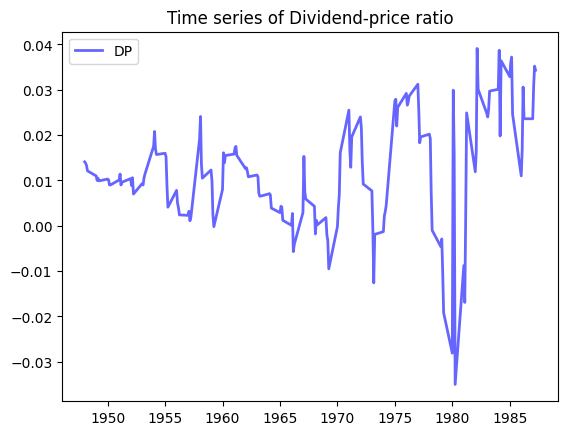

In [53]:
fig, ax = plt.subplots()
ax.plot(x,y, 'b-', linewidth=2, label='DP', alpha=0.6)
ax.legend()
# set the title
ax.set_title("Time series of Dividend-price ratio");

Corr(ERP,GNPG) is -0.0244


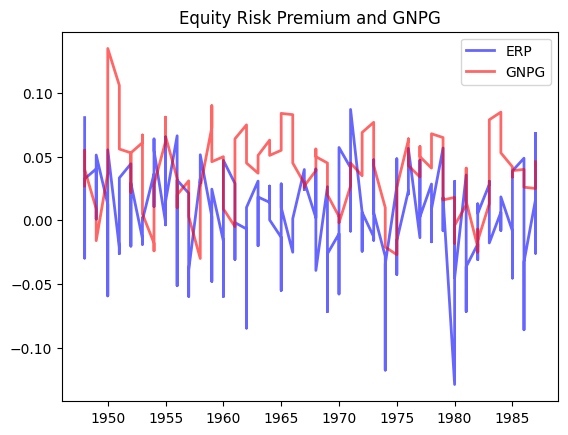

In [56]:
# Equity Risk Premium and GNPG

dates = riskfactors['year']
ERP = riskfactors['mktrf']
GNPG = riskfactors['realgnpg']

fig, ax = plt.subplots()
ax.plot(dates,ERP,'b-', linewidth=2, label='ERP', alpha=0.6)
ax.plot(dates,GNPG,'r-', linewidth=2, label='GNPG', alpha=0.6)
ax.legend()
ax.set_title("Equity Risk Premium and GNPG");

print("Corr(ERP,GNPG) is %.4f" % ERP.corr(GNPG)) #correlation between ERP and GNPG




Of course, for TAA purposes, we want to make much shorter investment horizon calls. Suppose for the next year we believe inflation moderates, the economy will do well as it continues to recover, but the market will not advance on what might be a currently fairly-valued position:

> Income return = 3.5%

> Real earnings growth = 3%

> Inflation = 5%

> P/E repricing = 1%

> 1-year bond yield = 3.5%

So ERP = 12.5 – 3.5 = 9%, or quite a bit more than the long-run ERP.



This particular forecast (a giant guess on my part!) relies on the stock market being a good inflation hedge, which it has been over history.

Perhaps the most difficult estimate is the P/E repricing. The S&P 500 P/E ratio has fluctuated from around 7 (in years like 1941, 1948 and as late as 1982) to over 35 in the tech boom of 1997. Prior to that, the P/E multiple had not exceeded 25 except barely and briefly in 1931 and 1992. It had climbed unsteadily from 1982 through 1997.

How can you forecast the P/E multiple? One simple way is to recall the Gordon constant perpetuity growth model:
$$𝑃_{0}=(𝑥∗𝐸_{1})/(𝐾−𝐺)$$

where $𝑥$ is the payout ratio (dividend per share / earnings per share), so $𝑥∗𝐸_{1}$ is expected dividends next year. $𝐾$ is the risk-adjusted discount rate, and $𝐺$ is the perpetual growth rate.

Thus, the forward $P/E$ ratio is:
$$\frac{𝑃_{0}}{𝐸_{1}}=\frac{𝑥}{(𝐾−𝐺)}$$

So, you would attach a positive P/E repricing effect if, over the year you expect:

(i) payout ratio increases

(ii) risk-adjusted rate decreases (smaller $K$)

(iii) growth rate increases (bigger $G$)

# **7. TAA: A Simple TAA Implementation**

Given expected bond and stock returns, we need to form a portfolio. Assume only two asset classes, bonds (b) and stock (s), with the following long-run reward and risk profiles:

$𝐸[𝑟_{𝑏}]=0.05$ and $\sigma_{𝑏}=0.10$

$𝐸[𝑟_{𝑠}]=0.10$ and $\sigma_{𝑠}=0.20$

The correlation of bond and stock returns is $\rho_{𝑏s} =0.60$

Thus, the covariance of bond $b$ and stock $s$ is $\sigma_{𝑏s} =0.60*0.10*0.20 = 0.012$ and $\sigma_{𝑏}^{2}+\sigma_{𝑠}^{2}−2\sigma_{bs} =0.026$

One portfolio construction technique is to use mean-variance analysis to give points along the efficient frontier:

> MVP (minimum variance portfolio): $𝑋_{𝑏}=1, 𝑋_{𝑠}=0,𝐸[r_{p}]=0.05$ and $\sigma_{𝑝}=0.10$

> Med-low risk portfolio: $𝑋_{𝑏}=0.778, 𝑋_{𝑠}=0.222,𝐸[r_{p}]=0.061$ and $\sigma_{𝑝}=0.11$

> Med risk portfolio: $𝑋_{𝑏}=0.55, 𝑋_{𝑠}=0.45,𝐸[r_{p}]=0.073$ and $\sigma_{𝑝}=0.13$

> Med-high risk portfolio: $𝑋_{𝑏}=0.333, 𝑋_{𝑠}=0.667,E[r_{p}]=0.083$ and $\sigma_{𝑝}=0.156$

> High risk portfolio: $𝑋_{𝑏}=0.111, 𝑋_{𝑠}=0.889,𝐸[r_{p}]=0.094$ and $\sigma_{𝑝}=0.185$

We could just pick a point off of this efficient frontier. But, suppose we use the asset-liability approach developed in Section OBJ from page OBJ-13 on. Assume we do this and the asset-liability solution to this long-run scenario is: $𝑋_{𝑏}=0.50, 𝑋_{𝑠}=0.50 $. This is quite close to the “55/45” mix off of the efficient frontier above. This gives us an “SAA allocation.” Now we want to implement a TAA methodology on top of the SAA allocation, moving us around the 50/50 mix depending on our shorter-term outlook for the stock market.
We can use this long-run SAA mix in the Sharpe Model (see page TAA-3) to determine the client's relative risk aversion (RRT):

Sharpe:

$K_{0}=\frac{\sigma_{𝐵}^{2}−\sigma_{𝐵S}}{\sigma_{𝐵}^{2}+\sigma_{𝑆}^{2}−2\sigma_{𝐵S}} = −0.002/0.026=−0.077$

$𝐾_{1𝑡} =\frac{𝐸_{𝑡}[𝑟_{𝑆}]−𝐸[𝑟_{𝐵}]}{\sigma_{𝐵}^{2}+\sigma_{S}^2−2\sigma_{BS}}=0.050/0.026=1.923$

At the SAA mix: $𝑋_{𝑠}=0.50=−0.077+(1.923)∗(𝑅RT)$ or $𝑅𝑅T=0.300$

We can now determine the client's TAA mix for any forecast of $𝐸RP =𝐸_{𝑡} [𝑟_{𝑠}]−𝐸[𝑟_{𝑏}]$, which will alter the value of $𝐾_{1𝑡}$ in the Sharpe formula.

If $𝐸[𝑟_{𝑠}]=0.12$ 𝑡hen $𝐾_{1𝑡} =0.070/0.026 =2.692$ and $𝑋_{𝑠}=0.731$

If $𝐸[𝑟_{𝑠}]=0.08$ then $𝐾_{1𝑡} =0.030/0.026=1.154$ and $𝑋_{𝑠}=0.269$

Our long-term $𝐸[𝑟_{𝑠}]=0.10$ leads to an SAA: $𝑋_{𝑠}=0.50$.

If our shorter-term TAA $𝐸[𝑟_{𝑠}]$ is higher than 10%, we hold more than 50% in stocks, if our stock forecast is less than 10%, we hold less than 50% in stocks.

The following graph plots the variance and expected returns for different portfolios.

Text(0.185, 0.094, 'High risk portfolio')

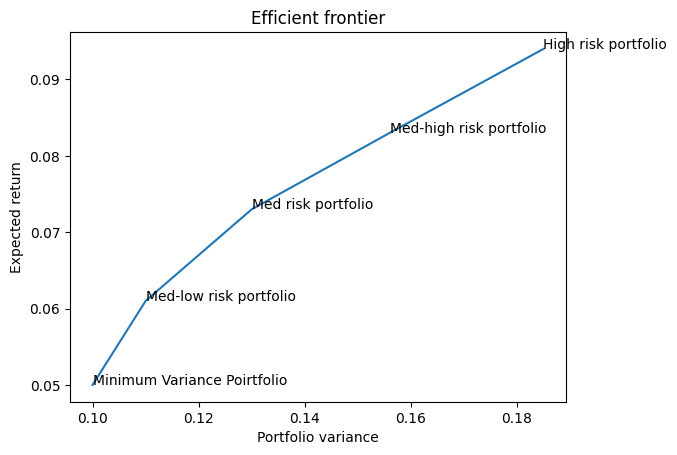

In [54]:
import matplotlib.pyplot as plt

rps = [0.05,0.061,0.073,0.083,0.094]
sigmaps = [0.1,0.11,0.13,0.156,0.185]

plt.plot(sigmaps,rps)
plt.title("Efficient frontier")
plt.xlabel("Portfolio variance")
plt.ylabel("Expected return")

plt.text(0.1,0.05,'Minimum Variance Poirtfolio')
plt.text(0.11,0.061,'Med-low risk portfolio')
plt.text(0.13,0.073,'Med risk portfolio')
plt.text(0.156,0.083,'Med-high risk portfolio')
plt.text(0.185,0.094,'High risk portfolio')

The functions below calculate covariance and expected returns.